In [1]:
setwd("/work/10000/wl87/imageCCA-master")
load("Lung_data_sample1.RData")
load("Lung_data_sample2.RData")

In [22]:
#-------------------------------------------
# check spatial genes
#-------------------------------------------

count_test_spark = data_sample2$count
location_test_spark = data_sample2$location
location_test_spark = as.matrix(location_test_spark)
sparkX <- SPARK::sparkx(	count_test_spark, location_test_spark,numCores=20)
significant_gene_number = sum(sparkX$res_mtest$adjustedPval<=0.05)
significant_gene_number = 1000
SVGnames_2 = rownames(sparkX$res_mtest[order(sparkX$res_mtest$adjustedPval),])[1:significant_gene_number]

## ===== SPARK-X INPUT INFORMATION ==== 
## number of total samples: 3858 
## number of total genes: 18066 
## Running with 20 cores 
## Testing With Projection Kernel
## Testing With Gaussian Kernel 1
## Testing With Gaussian Kernel 2
## Testing With Gaussian Kernel 3
## Testing With Gaussian Kernel 4
## Testing With Gaussian Kernel 5
## Testing With Cosine Kernel 1
## Testing With Cosine Kernel 2
## Testing With Cosine Kernel 3
## Testing With Cosine Kernel 4
## Testing With Cosine Kernel 5


In [23]:
print(SVGnames_2)

   [1] "IGFBP5"    "BGN"       "VCAN"      "CTHRC1"    "LGALS1"    "SULF1"    
   [7] "TXNDC5"    "VIM"       "FLNA"      "COL6A2"    "CALD1"     "FN1"      
  [13] "THBS2"     "SPARCL1"   "RHOB"      "MMP14"     "ACTN1"     "SPP1"     
  [19] "NUPR1"     "MT-ND5"    "CPE"       "ZFP36L1"   "COPZ2"     "SERPINB5" 
  [25] "TNFRSF21"  "TIMP1"     "POSTN"     "NPC2"      "MT-ATP6"   "IGFBP7"   
  [31] "MYH11"     "MT-CO3"    "MT-ND3"    "TIMP2"     "MT-ND4L"   "APOD"     
  [37] "ECM1"      "VEGFA"     "AEBP1"     "TPM2"      "COL17A1"   "MT-ND2"   
  [43] "MT-ND1"    "COL6A1"    "TNC"       "LAMB1"     "TAGLN"     "MT-CYB"   
  [49] "MXRA5"     "COL1A2"    "COL6A3"    "ACTB"      "SLC26A2"   "DDIT4"    
  [55] "SFRP2"     "CTSB"      "MBD1"      "NR1D1"     "CAVIN1"    "ANTXR1"   
  [61] "ISLR"      "NRP2"      "B2M"       "CACNA2D1"  "NPR3"      "S100A11"  
  [67] "PLAT"      "HMGN3"     "CNN2"      "MT-ND4"    "ACTA2"     "LRP1"     
  [73] "SAT1"      "NEK6"      "EFNA1"     "SERPINI1

In [30]:
write.table(SVGnames_2, file = "SVGnames_2.txt", row.names = FALSE, col.names = FALSE, quote = FALSE)

In [26]:
# 假设SVGnames和SVGnames_2已经定义并且是字符向量

# 计算交集：即SVGnames和SVGnames_2中都有的元素
intersection <- intersect(SVGnames, SVGnames_2)

# 计算差集：即SVGnames中有但SVGnames_2中没有的元素，以及SVGnames_2中有但SVGnames中没有的元素
difference_SVGnames <- setdiff(SVGnames, SVGnames_2)
difference_SVGnames_2 <- setdiff(SVGnames_2, SVGnames)

# 打印结果
cat("相同的元素数量:", length(intersection), "\n")
cat("只在SVGnames_1中的元素数量:", length(difference_SVGnames), "\n")
cat("只在SVGnames_2中的元素数量:", length(difference_SVGnames_2), "\n")

相同的元素数量: 249 
只在SVGnames_1中的元素数量: 751 
只在SVGnames_2中的元素数量: 751 


In [3]:
print(SVGnames)

   [1] "JUN"       "LMNA"      "CSRP1"     "LMCD1"     "PALLD"     "EGR1"     
   [7] "PDLIM7"    "HSPB1"     "ZYX"       "EGR3"      "H3F3B"     "JUNB"     
  [13] "IER2"      "MYADM"     "FAM118A"   "DUSP1"     "ZFP36"     "BTG2"     
  [19] "UBC"       "PLEKHO1"   "DDC"       "MT-ND3"    "SRF"       "ACTN4"    
  [25] "GBP2"      "LTBP4"     "TMSB10"    "CORO1C"    "TNFRSF12A" "NDRG1"    
  [31] "PHLDB1"    "FOSL2"     "CNN2"      "FOS"       "RHOC"      "CD63"     
  [37] "HIST1H1E"  "ID3"       "MCL1"      "DGKZ"      "PFKFB3"    "GSN"      
  [43] "AHNAK"     "LRP1"      "KLF2"      "UBL5"      "DKK3"      "VCL"      
  [49] "STAT6"     "HSPG2"     "MYL6"      "COL4A2"    "CDKN1A"    "MIDN"     
  [55] "CCN1"      "KAT2A"     "BHLHE40"   "CAVIN1"    "C1orf226"  "GEM"      
  [61] "CASC4"     "COL6A1"    "COL6A2"    "GADD45B"   "MAP2K3"    "TLN1"     
  [67] "C11orf96"  "LRFN5"     "SRRM2"     "LUC7L3"    "CFL1"      "CBX7"     
  [73] "PEBP1"     "EGR4"      "MT-ND4L"   "ACTG1"  

In [6]:
dim(data_sample1$count)

[1] 18085  6195

In [11]:
head(location_with_expression_df)

,pxl_row_in_fullres,pxl_col_in_fullres,Expression
,<int>,<int>,<dbl>
AACAATCCGAGTGGAC-1,1124,9810,5
AACAATGGAACCACAT-1,16580,6928,2
AACACCAGCCTACTCG-1,23862,8140,2
AACACCATTCGCATAC-1,17078,26469,3
AACACCGAGCTTGGAT-1,15935,5473,3
AACACCTAAGCATTGC-1,19754,8360,1


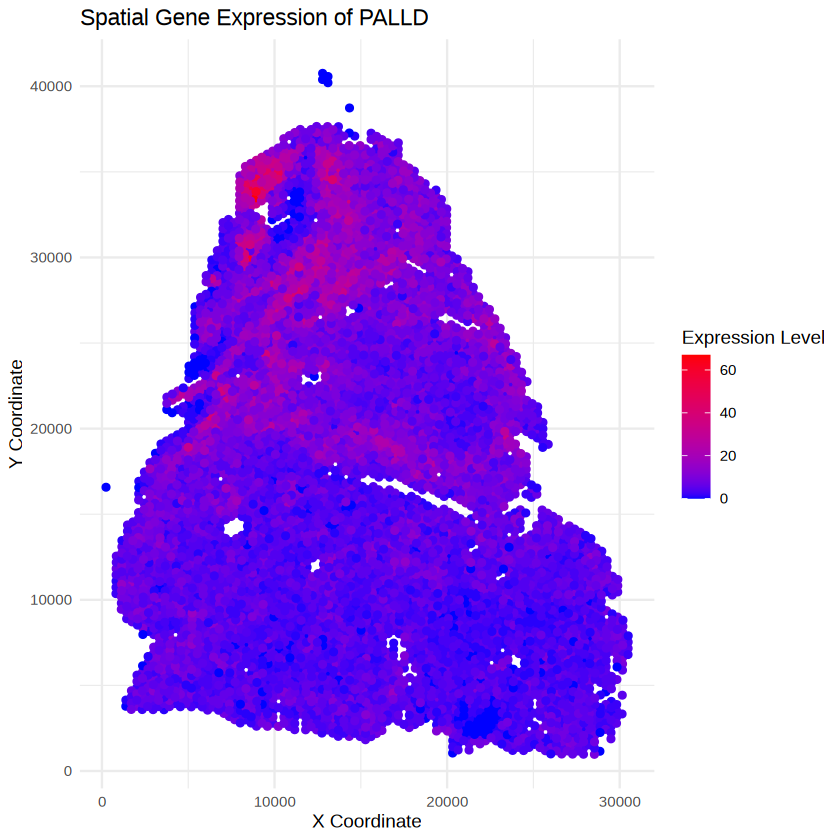

In [21]:
# 加载必要的库
library(ggplot2)
library(dplyr)

# 定义数据源
location_test_spark <- data_sample1$location
count_test_spark <- data_sample1$count
# 选择一个基因进行可视化
gene_to_plot <- SVGnames[5]

# 从count_matrix中提取该基因的表达数据
gene_expression <- count_test_spark[gene_to_plot, ]

# 将基因表达数据添加到location信息中
location_with_expression <- cbind(location_test_spark, Expression = gene_expression)

# 转换为data.frame，ggplot需要data.frame格式的数据
location_with_expression_df <- as.data.frame(location_with_expression)

# 使用ggplot2进行可视化
ggplot(location_with_expression_df, aes(x = location_test_spark[, 1], y = location_test_spark[, 2], color = Expression)) +
  geom_point() +
  scale_color_gradient(low = "blue", high = "red") +
  labs(title = paste("Spatial Gene Expression of", gene_to_plot),
       x = "X Coordinate",
       y = "Y Coordinate",
       color = "Expression Level") +
  theme_minimal()


In [ ]:
library(ggplot2)

# 定义新的 plot 函数
plot_fixed_size <- function(location_used, cluster, title_in, color_in, legend_position) {
  # 获取 location_used 的范围
  x_range <- range(location_used[, 1])
  y_range <- range(location_used[, 2])
  
  # 动态调整图像的宽度
  width <- (x_range[2] - x_range[1]) / (y_range[2] - y_range[1]) * 6
  
  # 创建 ggplot 散点图
  p <- ggplot(data.frame(location_used, cluster), aes(x = location_used[, 1], y = location_used[, 2], color = cluster)) +
    geom_point() +
    scale_color_manual(values = color_in) +
    labs(title = title_in) +
    theme(legend.position = legend_position)
  
  # 保存图像
  pdf(paste0("Fig1_Morphology_cluster_", cluster_num, ".pdf"), width = width, height = 6)
  print(p)
  dev.off()
}

# 使用新的 plot 函数
plot_fixed_size(data_use$location_used, as.character(cl$cluster), "Morphology clusters", D3, "right")

png 
  2

In [4]:
print(SVGnames)


   [1] "JUN"       "LMNA"      "CSRP1"     "LMCD1"     "PALLD"     "EGR1"     
   [7] "PDLIM7"    "HSPB1"     "ZYX"       "EGR3"      "H3F3B"     "JUNB"     
  [13] "IER2"      "MYADM"     "FAM118A"   "DUSP1"     "ZFP36"     "BTG2"     
  [19] "UBC"       "PLEKHO1"   "DDC"       "MT-ND3"    "SRF"       "ACTN4"    
  [25] "GBP2"      "LTBP4"     "TMSB10"    "CORO1C"    "TNFRSF12A" "NDRG1"    
  [31] "PHLDB1"    "FOSL2"     "CNN2"      "FOS"       "RHOC"      "CD63"     
  [37] "HIST1H1E"  "ID3"       "MCL1"      "DGKZ"      "PFKFB3"    "GSN"      
  [43] "AHNAK"     "LRP1"      "KLF2"      "UBL5"      "DKK3"      "VCL"      
  [49] "STAT6"     "HSPG2"     "MYL6"      "COL4A2"    "CDKN1A"    "MIDN"     
  [55] "CCN1"      "KAT2A"     "BHLHE40"   "CAVIN1"    "C1orf226"  "GEM"      
  [61] "CASC4"     "COL6A1"    "COL6A2"    "GADD45B"   "MAP2K3"    "TLN1"     
  [67] "C11orf96"  "LRFN5"     "SRRM2"     "LUC7L3"    "CFL1"      "CBX7"     
  [73] "PEBP1"     "EGR4"      "MT-ND4L"   "ACTG1"  

In [4]:
# Assuming SVGnames is a vector of strings
writeLines(SVGnames, "SVGnames.txt")

In [4]:
# remove batch effect in HE feature
#---------------------------------

# create seurat object for each dataset
library(Seurat)
HE_list = list(data_sample1$HEfeature,data_sample2$HEfeature)
location_list = list(data_sample1$location,data_sample2$location)
seurat_list = list()
for(HE in 1:length(HE_list)){
    colnames(HE_list[[HE]]) = paste0("Sample",HE,"_",colnames(HE_list[[HE]]))
    colnames(location_list[[HE]]) = colnames(HE_list[[HE]])
    seurat_list[[HE]] <- CreateSeuratObject(counts  = HE_list[[HE]], project = "multiple")
}

# normalize and identify variable features for each dataset independently
seurat_list <- lapply(X = seurat_list, FUN = function(x) {
    print(paste0("Normalizing dataset"))
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 10000)
})

# select features that are repeatedly variable across datasets for integration
features <- Seurat::SelectIntegrationFeatures(object.list = seurat_list,nfeatures = 10000)
# integration, find anchors
MultipleSample.anchors <- Seurat::FindIntegrationAnchors(object.list = seurat_list, anchor.features = features)
# this command creates an 'integrated' data assay
MultipleSample.combined <- Seurat::IntegrateData(anchorset = MultipleSample.anchors)
DefaultAssay(MultipleSample.combined) <- "integrated"
# Run the standard workflow for visualization and clustering
MultipleSample.combined <- Seurat::ScaleData(MultipleSample.combined, verbose = FALSE)
# obtain integrated and normalized data
integrated_data = MultipleSample.combined@assays$integrated@scale.data

# 假设每个样本的HEfeature有1024个特征
num_features_per_sample <- 1024

# 从整合后的数据中提取每个样本的部分
data_sample1_integrated_HE_n <- integrated_data[, 1:num_features_per_sample]
data_sample2_integrated_HE_n <- integrated_data[, (num_features_per_sample + 1):(num_features_per_sample * 2)]

# 确保列名与原始HEfeature列名一致
colnames(data_sample1_integrated_HE_n) <- colnames(data_sample1$HEfeature)
colnames(data_sample2_integrated_HE_n) <- colnames(data_sample2$HEfeature)

# 将整合后的数据分配回原始数据结构
data_sample1$integrated_HE_n <- data_sample1_integrated_HE_n
data_sample2$integrated_HE_n <- data_sample2_integrated_HE_n

ERROR: Error in names(x) <- value: 'names' attribute [1025] must be the same length as the vector [2]


In [2]:
names(data_sample1)

[1] "count"            "location"         "HEfeature"        "morph"           
 [5] "HEcelltype"       "integrated_expr"  "integrated_HE"    "scater_norm"     
 [9] "HEcelltype_ratio" "count_matrix"     "count_t"

In [5]:
# tranpose data_sample1$integrated_HE
data_sample1$integrated_HE <- t(data_sample1$integrated_HE)
data_sample2$integrated_HE <- t(data_sample2$integrated_HE)
dim(data_sample1_integrated_HE_df)
dim(data_sample2$integrated_HE)

[1] 6195 1025

[1] 1024 3858

In [4]:
setwd("/work/10000/wl87/imageCCA-master/outs/integrate")

library(arrow)

# Convert matrix/array to data frame
data_sample1_integrated_HE_df <- as.data.frame(data_sample1$integrated_HE)
data_sample2_integrated_HE_df <- as.data.frame(data_sample2$integrated_HE)

# 将行名添加为名为'Barcode'的新列
data_sample1_integrated_HE_df$Barcode <- rownames(data_sample1_integrated_HE_df)
data_sample2_integrated_HE_df$Barcode <- rownames(data_sample2_integrated_HE_df)

# Write the data frames to Feather files
write_feather(data_sample1_integrated_HE_df, "Lung_data_sample1_integratedHE.feather")
write_feather(data_sample2_integrated_HE_df, "Lung_data_sample2_integratedHE.feather")


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [5]:
# 将行名添加为名为'Barcode'的新列
data_sample1$integrated_HE$Barcode <- rownames(data_sample1$integrated_HE)
data_sample2$integrated_HE$Barcode <- rownames(data_sample2$integrated_HE)

Warning message in data_sample1$integrated_HE$Barcode <- rownames(data_sample1$integrated_HE):
“Coercing LHS to a list”
Warning message in data_sample2$integrated_HE$Barcode <- rownames(data_sample2$integrated_HE):
“Coercing LHS to a list”


In [6]:
data_sample1$integrated_HE

In [7]:
data_sample1$integrated_HE

In [5]:
dim(data_sample1$HEfeature)
dim(data_sample1$integrated_HE)

[1] 6195 1025

NULL

In [2]:

# create seurat object for each dataset
library(Seurat)
count_list = list(data_sample1$count,data_sample2$count)
location_list = list(data_sample1$location,data_sample2$location)
seurat_list = list()
for(count in 1:length(count_list)){
    colnames(count_list[[count]]) = paste0("Sample",count,"_",colnames(count_list[[count]]))
    rownames(location_list[[count]]) = colnames(count_list[[count]])
    seurat_list[[count]] <- CreateSeuratObject(counts = count_list[[count]], project = "multiple")
}

# normalize and identify variable features for each dataset independently
seurat_list <- lapply(X = seurat_list, FUN = function(x) {
    print(paste0("Normalizing dataset"))
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 10000)
})

# select features that are repeatedly variable across datasets for integration
features <- Seurat::SelectIntegrationFeatures(object.list = seurat_list,nfeatures = 10000)
# integration, find anchors
MultipleSample.anchors <- Seurat::FindIntegrationAnchors(object.list = seurat_list, anchor.features = features)
# this command creates an 'integrated' data assay
MultipleSample.combined <- Seurat::IntegrateData(anchorset = MultipleSample.anchors)
DefaultAssay(MultipleSample.combined) <- "integrated"
# Run the standard workflow for visualization and clustering
MultipleSample.combined <- Seurat::ScaleData(MultipleSample.combined, verbose = FALSE)
# obtain integrated and normalized data
integrated_data = MultipleSample.combined@assays$integrated@scale.data

data_sample1$integrated_expr = integrated_data[,1:6195]
colnames(data_sample1$integrated_expr) = colnames(data_sample1$count)
data_sample2$integrated_expr = integrated_data[,6196:10053]
colnames(data_sample2$integrated_expr) = colnames(data_sample2$count)

data_sample1$integrated_expr <- t(data_sample1$integrated_expr)
data_sample2$integrated_expr <- t(data_sample2$integrated_expr)


Loading required package: SeuratObject

Loading required package: sp



‘SeuratObject’ was built under R 4.3.1 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




[1] "Normalizing dataset"


Normalizing layer: counts

Finding variable features for layer counts



[1] "Normalizing dataset"


Normalizing layer: counts

Finding variable features for layer counts

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 12139 anchors

Filtering anchors

	Retained 1593 anchors

Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Warning message:
“Layer counts isn't present in the assay object; returning NULL”


In [4]:
setwd("/work/10000/wl87/imageCCA-master/outs/integrate")

library(arrow)

# Convert matrix/array to data frame
data_sample1_integrated_expr_df <- as.data.frame(data_sample1$integrated_expr)
data_sample2_integrated_expr_df <- as.data.frame(data_sample2$integrated_expr)

# 将行名添加为名为'Barcode'的新列
data_sample1_integrated_expr_df$Barcode <- rownames(data_sample1_integrated_expr_df)
data_sample2_integrated_expr_df$Barcode <- rownames(data_sample2_integrated_expr_df)

# Write the data frames to Feather files
write_feather(data_sample1_integrated_expr_df, "Lung_data_sample1_integrated_expr10k.feather")
write_feather(data_sample2_integrated_expr_df, "Lung_data_sample2_integrated_expr10k.feather")


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [3]:
head(data_sample1$integrated_expr)

,SFTPC,IGHA1,IGHG1,IGKC,SCGB3A1,JCHAIN,CHIT1,IGLC1,IGHM,MARCO,⋯,MICOS10,ASCC2,IDH3G,FAM178B,RGS7BP,HEATR6,PPT2,DNAJC25,LSM1,LRRC28
AACAATCCGAGTGGAC-1,-0.4105591,-0.351585,-0.3310363,-0.3479211,-0.35200215,-0.2873614,-0.1160962,-0.2184128,-0.1135662,-0.37090600,⋯,-0.01602978,0.1576380,0.2633398,-0.1038172,-0.62392494,0.9576667,0.4571433,0.09298647,-0.63272713,-0.06901233
AACAATGGAACCACAT-1,-0.4802798,-0.351585,-0.3310363,-0.2678758,-0.35200215,-0.2873614,0.1232456,-0.2184128,-0.1135662,0.05361696,⋯,0.77731890,-0.5158170,0.7133756,-0.1038172,-0.62392494,-0.5143246,-0.8449693,0.22134146,-0.75316701,0.07918714
AACACCAGCCTACTCG-1,-0.3513185,-0.351585,-0.3310363,-0.2954238,-0.03676649,-0.2873614,-0.3008368,-0.2184128,-0.1135662,-0.37090600,⋯,1.09676594,-0.3560273,-0.2832029,-0.1038172,1.22572276,0.9048330,0.4104069,-0.57011822,0.48355333,1.60669351
AACACCATTCGCATAC-1,-0.4015509,-0.351585,-0.3310363,-0.3399383,-0.35200215,-0.2873614,-0.3008368,-0.2184128,-0.1135662,-0.37090600,⋯,0.48012089,0.6259036,0.7615768,0.7865024,-0.01899467,0.3741280,0.2866382,-0.18079237,0.06286489,0.02583041
AACACCGAGCTTGGAT-1,-0.4802798,-0.351585,-0.3310363,-0.4097057,-0.35200215,-0.2873614,-0.3008368,-0.2184128,-0.1135662,-0.37090600,⋯,0.91518263,-0.3990898,-1.0988874,-0.1038172,0.32729839,-0.5143246,-0.1993636,0.04207767,-0.15795083,0.48808117
AACACCTAAGCATTGC-1,-0.4802798,-0.351585,-0.3310363,-0.1996643,-0.35200215,-0.2873614,-0.3008368,-0.2184128,-0.1135662,-0.37090600,⋯,0.82820992,1.3255249,0.8522817,-0.1038172,0.35074330,-0.5143246,1.3539015,0.05716653,-0.13243764,0.51868083


In [3]:
ls()
names(data_sample1)

[1] "data_sample1" "data_sample2"

[1] "count"            "location"         "HEfeature"        "morph"           
 [5] "HEcelltype"       "integrated_expr"  "integrated_HE"    "scater_norm"     
 [9] "HEcelltype_ratio" "count_matrix"     "count_t"

In [2]:
dim(data_sample1$HEcelltype)
dim(data_sample2$HEcelltype)

[1] 6121    5

[1] 3772    5

In [3]:
library(dplyr)

# 使用 rowwise() 来按行处理数据
data_sample1$HEcelltype_ratio <- data_sample1$HEcelltype %>%
  rowwise() %>%
  mutate(across(t:l, ~ . / sum(c_across(t:l)), .names = "proportion_{col}")) %>%
  ungroup()



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
# 使用 rowwise() 来按行处理数据
data_sample2$HEcelltype_ratio <- data_sample2$HEcelltype %>%
  rowwise() %>%
  mutate(across(t:l, ~ . / sum(c_across(t:l)), .names = "proportion_{col}")) %>%
  ungroup()

In [5]:
data_sample1$count_matrix <- as.matrix(data_sample1$count)
data_sample1$count_t <- t(data_sample1$count_matrix)

data_sample2$count_matrix <- as.matrix(data_sample2$count)
data_sample2$count_t <- t(data_sample2$count_matrix)

Loading required package: Matrix



In [6]:
# 将 count_t 矩阵转换为数据框
count_t_df <- as.data.frame(data_sample1$count_t)

# 保持行名作为新的数据框的列名
count_t_df$Barcode <- rownames(count_t_df)

# 重新排列列顺序，将 Barcode 列放在第一列
count_t_df <- count_t_df[, c("Barcode", colnames(count_t_df)[-ncol(count_t_df)])]

# 现在可以将 count_t_df 赋值回 data_sample1$count_t
data_sample1$count_t <- count_t_df


In [7]:
# 将 count_t 矩阵转换为数据框
count_t_df <- as.data.frame(data_sample2$count_t)

# 保持行名作为新的数据框的列名
count_t_df$Barcode <- rownames(count_t_df)

# 重新排列列顺序，将 Barcode 列放在第一列
count_t_df <- count_t_df[, c("Barcode", colnames(count_t_df)[-ncol(count_t_df)])]

# 现在可以将 count_t_df 赋值回 data_sample1$count_t
data_sample2$count_t <- count_t_df

In [8]:
save(data_sample1, file = "Lung_data_sample1.RData")
save(data_sample2, file = "Lung_data_sample2.RData")

In [9]:
setwd("/work/10000/wl87/imageCCA-master/outs/integrate")

library(arrow)

write_feather(data_sample1$count_t, "Lung_data_sample1_count.feather")
write_feather(data_sample2$count_t, "Lung_data_sample2_count.feather")
write_feather(data_sample1$HEcelltype_ratio, "Lung_data_sample1_HEcelltype_ratio.feather")
write_feather(data_sample2$HEcelltype_ratio, "Lung_data_sample2_HEcelltype_ratio.feather")


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [5]:
setwd("/work/10000/wl87/imageCCA-master/outs/integrate")

library(arrow)

write_feather(data_sample1$location, "Lung_data_sample1_location.feather")
write_feather(data_sample2$location, "Lung_data_sample2_location.feather")
write_feather(data_sample1$HEfeature, "Lung_data_sample1_HEfeature.feather")
write_feather(data_sample2$HEfeature, "Lung_data_sample2_HEfeature.feather")

In [ ]:
library(arrow)

# 将对象转换为 data.frame
integrated_data_spot_11 <- as.data.frame(integrated_data_spot_11)

In [ ]:
head(data_sample2$count_t)

In [14]:
data_sample1$count_t$Barcode <- rownames(data_sample1$count_t)
data_sample2$count_t$Barcode <- rownames(data_sample2$count_t)

Warning message in data_sample1$count_t$Barcode <- rownames(data_sample1$count_t):
“Coercing LHS to a list”
Warning message in data_sample2$count_t$Barcode <- rownames(data_sample2$count_t):
“Coercing LHS to a list”


In [3]:
data_sample1$location$Barcode <- rownames(data_sample1$location)
data_sample2$location$Barcode <- rownames(data_sample2$location)

# data_sample1$count_t$Barcode <- rownames(data_sample1$count_t)
# data_sample2$count_t$Barcode <- rownames(data_sample2$count_t)

In [4]:
head(data_sample1$location)

,pxl_row_in_fullres,pxl_col_in_fullres,Barcode
,<int>,<int>,<chr>
AACAATCCGAGTGGAC-1,1124,9810,AACAATCCGAGTGGAC-1
AACAATGGAACCACAT-1,16580,6928,AACAATGGAACCACAT-1
AACACCAGCCTACTCG-1,23862,8140,AACACCAGCCTACTCG-1
AACACCATTCGCATAC-1,17078,26469,AACACCATTCGCATAC-1
AACACCGAGCTTGGAT-1,15935,5473,AACACCGAGCTTGGAT-1
AACACCTAAGCATTGC-1,19754,8360,AACACCTAAGCATTGC-1


In [7]:
dim(data_sample1$location)
dim(data_sample2$location)

[1] 6195    2

[1] 3858    2

In [8]:
dim(data_sample1$HEfeature)
dim(data_sample2$HEfeature)

[1] 6195 1025

[1] 3858 1025

In [8]:
head(data_sample1$HEfeature)

,Barcode,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,⋯,feat_1014,feat_1015,feat_1016,feat_1017,feat_1018,feat_1019,feat_1020,feat_1021,feat_1022,feat_1023
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AACAATCCGAGTGGAC-1,-0.5070344,-3.244152,-1.1362956,0.7045153,-0.7064465,0.6491063,0.6227882,-1.31787480,-0.5767940,⋯,-0.9585910,0.07872614,1.2146703,0.7358839,-0.61217820,0.04170677,1.00329040,-0.4404078,1.45779560,0.7982113
2,AACAATGGAACCACAT-1,-1.0755593,-1.615856,-1.0244560,-1.2304260,-1.1247315,3.2032087,-0.3516549,0.03285575,0.5572442,⋯,0.9576286,0.55516845,2.4426048,1.3552349,-0.98260665,-0.06977151,0.96647540,-0.6414169,0.85402600,-0.2161292
3,AACACCAGCCTACTCG-1,-0.9575208,-3.132489,-1.0128738,-1.2154019,-1.0737758,2.8237286,0.5839687,0.17984252,1.3463084,⋯,1.1141722,-0.30509190,0.6850283,0.8831923,0.37423770,0.48170862,0.20487773,0.2351751,1.56855140,0.3319582
4,AACACCATTCGCATAC-1,-0.6238288,-2.655712,-1.5798618,-1.3501445,-0.7849173,2.6055903,1.7063375,-0.55789580,0.5908753,⋯,0.2011375,0.04781451,0.6046801,1.6685379,0.25616044,0.01099800,-0.35441834,-0.0855381,0.85988780,0.6607797
5,AACACCGAGCTTGGAT-1,-0.4753613,-1.927211,-0.9639591,-1.2618845,-1.2301586,3.3891172,1.7344055,-0.47562316,1.7361875,⋯,2.0441718,0.10590346,0.6700568,0.7763315,-0.30747090,0.19164250,0.02019397,0.3208050,0.07818881,1.0296254
6,AACACCTAAGCATTGC-1,-0.3574742,-3.447398,-1.1022307,-1.0351992,-1.9369925,2.7637272,-0.3956048,-0.94368440,1.3205532,⋯,0.4341668,0.86004100,1.3688950,0.8895022,0.04652365,-0.74431440,0.15108913,-0.1063864,1.68398770,1.2132479


In [11]:
dim(data_sample1$count_t)
dim(data_sample2$count_t)

[1]  6195 18085

[1]  3858 18085

In [9]:
head(data_sample1$count_t)

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,⋯,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
AACAATCCGAGTGGAC-1,1,6,0,0,0,4,4,10,1,1,⋯,271,1126,751,2061,309,648,684,165,74,746
AACAATGGAACCACAT-1,0,1,0,0,0,1,2,4,0,0,⋯,131,522,443,960,243,229,404,69,30,414
AACACCAGCCTACTCG-1,0,3,0,1,0,1,0,0,0,1,⋯,179,643,548,1131,347,276,376,111,45,446
AACACCATTCGCATAC-1,0,10,0,1,2,4,0,6,0,2,⋯,375,1472,1092,2441,562,547,829,191,90,895
AACACCGAGCTTGGAT-1,2,5,0,0,0,1,0,4,0,0,⋯,175,742,693,1353,356,254,468,130,55,559
AACACCTAAGCATTGC-1,0,4,0,0,0,3,0,2,1,0,⋯,208,798,760,1523,448,343,494,143,76,645


In [10]:
head(data_sample1$HEcelltype_ratio)

Barcode,t,o,f,l,proportion_t,proportion_o,proportion_f,proportion_l
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ACGGTGATACAACCGC-1,94,1,3,0,0.9591837,0.01020408,0.03061224,0.00000000
TATGGCCTAGCGGCTA-1,93,1,0,0,0.9893617,0.01063830,0.00000000,0.00000000
TAAGGTATCCACCGCT-1,92,4,1,2,0.9292929,0.04040404,0.01010101,0.02020202
TATTGAATCTCACGCC-1,90,0,0,0,1.0000000,0.00000000,0.00000000,0.00000000
ATAGGACTCATATGGC-1,88,2,0,0,0.9777778,0.02222222,0.00000000,0.00000000
CTTGGTAGAAGTCGGT-1,88,6,0,3,0.9072165,0.06185567,0.00000000,0.03092784


In [23]:
print(barcodes_HEcelltype)

   [1] "ACGGTGATACAACCGC-1" "TATGGCCTAGCGGCTA-1" "TAAGGTATCCACCGCT-1"
   [4] "TATTGAATCTCACGCC-1" "ATAGGACTCATATGGC-1" "CTTGGTAGAAGTCGGT-1"
   [7] "AATCACCTGAAGCACC-1" "ACATTCTACTTAGATT-1" "TCGCCACTGTCCATAG-1"
  [10] "GGTGATCGACGCTTGT-1" "AGGCGACCACGCACCT-1" "CGAATGATCACCGCTC-1"
  [13] "GACCGGTAAGCTCACG-1" "CTACTGGAATAACAGA-1" "TCGTCATCACCATCTT-1"
  [16] "AGTTATTGAGTACCAG-1" "CATAGAAGGACACCTT-1" "ATCAAGTTGGCTCAGA-1"
  [19] "ACATTGTATGTCCAAG-1" "ATTAGACACCAGTCCA-1" "CCTAGTATCGCATCAC-1"
  [22] "CTGCTATCTGCTTCAT-1" "CTGGTGATCACTCCGT-1" "TCAGTATCAGTCTGTA-1"
  [25] "AGTCGGCCGAGGTCTA-1" "ATACGCGGTACGCTGT-1" "CCATCATGATGTATAG-1"
  [28] "AACCAAGTGACCGAAG-1" "CAATACCGCTTCCAAG-1" "CGAAGACTGTTAGAAG-1"
  [31] "CGTACTTAGGACTCAG-1" "GTAACCACAGCACGAC-1" "ATAGTGTCTGCATCGG-1"
  [34] "CAACTGCTGGCTATCC-1" "CCTGGACTCGTCCTTA-1" "TAAGTGCCGATATTGT-1"
  [37] "ACAGGACACGCAGCAC-1" "ACATCATAGAGCACAG-1" "AGATGAGCTCATAGTT-1"
  [40] "AGTGCGACATTGCTCG-1" "CATGTCTGGCCACTAA-1" "CCTTCAGCCTCACGGC-1"
  [43] "CTATTAGAGCAG

In [16]:
print(barcodes_location)

   [1] "AACAATCCGAGTGGAC-1" "AACAATGGAACCACAT-1" "AACACCAGCCTACTCG-1"
   [4] "AACACCATTCGCATAC-1" "AACACCGAGCTTGGAT-1" "AACACCTAAGCATTGC-1"
   [7] "AACACGCAGATAACAA-1" "AACACTCGAAGTATCA-1" "AACACTCGTGAGCTTC-1"
  [10] "AACAGGAATTCTGTGA-1" "AACAGGATACTCTTAG-1" "AACAGGCCAGGCCGCT-1"
  [13] "AACAGGCCATCCGCGT-1" "AACAGGCCATTGTCAC-1" "AACAGTATCAACGCTT-1"
  [16] "AACAGTATCCGCCTGG-1" "AACAGTCAATGTGATA-1" "AACAGTCTGGTTGATG-1"
  [19] "AACAGTGATGTACATC-1" "AACATACTAGCCGAAG-1" "AACATACTCCACAGTT-1"
  [22] "AACATACTCCAGCTGA-1" "AACATAGAAGGTGAGT-1" "AACATAGGAGGCGTCC-1"
  [25] "AACATAGGTCCATAGC-1" "AACATAGGTTCCGCAC-1" "AACATAGTCGCAGCTC-1"
  [28] "AACATATGCACTTCTA-1" "AACATCAACATCTTGA-1" "AACATCAAGGCTGGCT-1"
  [31] "AACATGACCGTACGGA-1" "AACATGACGCCTGGAC-1" "AACATGCACTTCGGAT-1"
  [34] "AACCAACAATCGGTAC-1" "AACCAAGACCAACTGA-1" "AACCAAGCGTATACCG-1"
  [37] "AACCAAGCTAGATACG-1" "AACCAAGGCGTTATGT-1" "AACCAAGTGACCGAAG-1"
  [40] "AACCAATCAGTTCCTC-1" "AACCAATCCGATCGCT-1" "AACCATAAGCTCGACT-1"
  [43] "AACCATACCATA

In [17]:
print(barcodes_count)

   [1] "AACAATCCGAGTGGAC-1" "AACAATGGAACCACAT-1" "AACACCAGCCTACTCG-1"
   [4] "AACACCATTCGCATAC-1" "AACACCGAGCTTGGAT-1" "AACACCTAAGCATTGC-1"
   [7] "AACACGCAGATAACAA-1" "AACACTCGAAGTATCA-1" "AACACTCGTGAGCTTC-1"
  [10] "AACAGGAATTCTGTGA-1" "AACAGGATACTCTTAG-1" "AACAGGCCAGGCCGCT-1"
  [13] "AACAGGCCATCCGCGT-1" "AACAGGCCATTGTCAC-1" "AACAGTATCAACGCTT-1"
  [16] "AACAGTATCCGCCTGG-1" "AACAGTCAATGTGATA-1" "AACAGTCTGGTTGATG-1"
  [19] "AACAGTGATGTACATC-1" "AACATACTAGCCGAAG-1" "AACATACTCCACAGTT-1"
  [22] "AACATACTCCAGCTGA-1" "AACATAGAAGGTGAGT-1" "AACATAGGAGGCGTCC-1"
  [25] "AACATAGGTCCATAGC-1" "AACATAGGTTCCGCAC-1" "AACATAGTCGCAGCTC-1"
  [28] "AACATATGCACTTCTA-1" "AACATCAACATCTTGA-1" "AACATCAAGGCTGGCT-1"
  [31] "AACATGACCGTACGGA-1" "AACATGACGCCTGGAC-1" "AACATGCACTTCGGAT-1"
  [34] "AACCAACAATCGGTAC-1" "AACCAAGACCAACTGA-1" "AACCAAGCGTATACCG-1"
  [37] "AACCAAGCTAGATACG-1" "AACCAAGGCGTTATGT-1" "AACCAAGTGACCGAAG-1"
  [40] "AACCAATCAGTTCCTC-1" "AACCAATCCGATCGCT-1" "AACCATAAGCTCGACT-1"
  [43] "AACCATACCATA

In [20]:
print(barcodes_HE_feature)

   [1] "ACGGTGATACAACCGC-1" "TATGGCCTAGCGGCTA-1" "TAAGGTATCCACCGCT-1"
   [4] "TATTGAATCTCACGCC-1" "ATAGGACTCATATGGC-1" "CTTGGTAGAAGTCGGT-1"
   [7] "AATCACCTGAAGCACC-1" "ACATTCTACTTAGATT-1" "TCGCCACTGTCCATAG-1"
  [10] "GGTGATCGACGCTTGT-1" "AGGCGACCACGCACCT-1" "CGAATGATCACCGCTC-1"
  [13] "GACCGGTAAGCTCACG-1" "CTACTGGAATAACAGA-1" "TCGTCATCACCATCTT-1"
  [16] "AGTTATTGAGTACCAG-1" "CATAGAAGGACACCTT-1" "ATCAAGTTGGCTCAGA-1"
  [19] "ACATTGTATGTCCAAG-1" "ATTAGACACCAGTCCA-1" "CCTAGTATCGCATCAC-1"
  [22] "CTGCTATCTGCTTCAT-1" "CTGGTGATCACTCCGT-1" "TCAGTATCAGTCTGTA-1"
  [25] "AGTCGGCCGAGGTCTA-1" "ATACGCGGTACGCTGT-1" "CCATCATGATGTATAG-1"
  [28] "AACCAAGTGACCGAAG-1" "CAATACCGCTTCCAAG-1" "CGAAGACTGTTAGAAG-1"
  [31] "CGTACTTAGGACTCAG-1" "GTAACCACAGCACGAC-1" "ATAGTGTCTGCATCGG-1"
  [34] "CAACTGCTGGCTATCC-1" "CCTGGACTCGTCCTTA-1" "TAAGTGCCGATATTGT-1"
  [37] "ACAGGACACGCAGCAC-1" "ACATCATAGAGCACAG-1" "AGATGAGCTCATAGTT-1"
  [40] "AGTGCGACATTGCTCG-1" "CATGTCTGGCCACTAA-1" "CCTTCAGCCTCACGGC-1"
  [43] "CTATTAGAGCAG

In [22]:
# 提取每个数据框的条形码（行名）
barcodes_HEcelltype <- data_sample1$HEcelltype_ratio$Barcode
barcodes_location <- rownames(data_sample1$location)
barcodes_count <- rownames(data_sample1$count_t)
barcodes_HE_feature <- data_sample1$HEfeature$Barcode


# 检查 HEcelltype 和 location 是否对齐
aligned_HE_location <- all(barcodes_HEcelltype == barcodes_location)
cat("HEcelltype 和 location 是否对齐: ", aligned_HE_location, "\n")

# 检查 HEcelltype 和 count 是否对齐
aligned_HE_count <- all(barcodes_HEcelltype == barcodes_count)
cat("HEcelltype 和 count 是否对齐: ", aligned_HE_count, "\n")

# 检查 HEcelltype 和 HEfeature 是否对齐
aligned_HE_feature <- all(barcodes_HEcelltype == barcodes_HE_feature)
cat("HEcelltype 和 HEfeature 是否对齐: ", aligned_HE_feature, "\n")


# 找出不匹配的条形码（如果有）
if (!aligned_HE_location) {
  mismatches_HE_location <- which(barcodes_HEcelltype != barcodes_location)
  cat("HEcelltype 和 location 不匹配的条形码索引: ", mismatches_HE_location, "\n")
}

if (!aligned_HE_count) {
  mismatches_HE_count <- which(barcodes_HEcelltype != barcodes_count)
  cat("HEcelltype 和 count 不匹配的条形码索引: ", mismatches_HE_count, "\n")
}

if (!aligned_HE_feature) {
  mismatches_HE_feature <- which(barcodes_HEcelltype != barcodes_HE_feature)
  cat("HEcelltype 和 HEfeature 不匹配的条形码索引: ", mismatches_HE_feature, "\n")
}


Warning message in barcodes_HEcelltype == barcodes_location:
“longer object length is not a multiple of shorter object length”


HEcelltype 和 location 是否对齐:  FALSE 


Warning message in barcodes_HEcelltype == barcodes_count:
“longer object length is not a multiple of shorter object length”


HEcelltype 和 count 是否对齐:  FALSE 


Warning message in barcodes_HEcelltype == barcodes_HE_feature:
“longer object length is not a multiple of shorter object length”


HEcelltype 和 HEfeature 是否对齐:  FALSE 


Warning message in barcodes_HEcelltype != barcodes_location:
“longer object length is not a multiple of shorter object length”


HEcelltype 和 location 不匹配的条形码索引:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 27

Warning message in barcodes_HEcelltype != barcodes_count:
“longer object length is not a multiple of shorter object length”


HEcelltype 和 count 不匹配的条形码索引:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 2

Warning message in barcodes_HEcelltype != barcodes_HE_feature:
“longer object length is not a multiple of shorter object length”


HEcelltype 和 HEfeature 不匹配的条形码索引:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 2

In [1]:
setwd("/work/10000/wl87/imageCCA-master/outs/integrate")
# load integrated data
load("integrated_data_spot.RData")
integrated_data_spot <- integrated_data

load("integrated_data2.RData")
integrated_data_expr <- integrated_data

In [8]:
dim(integrated_data_spot)
dim(integrated_data_expr)


[1]  1024 10053

[1]   511 10053

In [17]:
# 切分 integrated_data_spot 按列
integrated_data_spot_11 <- integrated_data_spot[, 1:6195]
integrated_data_spot_FF <- integrated_data_spot[, 6196:10053]

# 切分 integrated_data_expr 按列
integrated_data_expr_11 <- integrated_data_expr[, 1:6195]
integrated_data_expr_FF <- integrated_data_expr[, 6196:10053]

integrated_data_spot_11 <- t(integrated_data_spot_11)
integrated_data_spot_FF <- t(integrated_data_spot_FF)
integrated_data_expr_11 <- t(integrated_data_expr_11)
integrated_data_expr_FF <- t(integrated_data_expr_FF)
# 检查切分后的数据维度
dim(integrated_data_spot_11)
dim(integrated_data_spot_FF)
dim(integrated_data_expr_11)
dim(integrated_data_expr_FF)


[1] 6195 1024

[1] 3858 1024

[1] 6195  511

[1] 3858  511

In [18]:
head(integrated_data_spot_11)
head(integrated_data_expr_11)
head(integrated_data_spot_FF)
head(integrated_data_expr_FF)

,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,⋯,feat1014,feat1015,feat1016,feat1017,feat1018,feat1019,feat1020,feat1021,feat1022,feat1023
AACAATCCGAGTGGAC-1,-0.1595529,-1.6538581,0.3566399,2.0598979,-0.2532280,-1.2151580,-0.6831659,-1.0825155,-1.2299707,-2.2321008,⋯,-1.5032061,0.1473549,0.3383483,-0.203711691,-0.42789792,0.3937838,1.8997635,-0.57205978,0.5098253,-0.05186392
AACAATGGAACCACAT-1,-1.0376767,0.2651934,0.4977853,-0.5287485,-0.7355696,1.0046725,-1.7697761,0.4267785,0.1161787,-0.3643455,⋯,0.5973397,0.7271366,1.9145458,0.646249979,-0.84526121,0.1080755,1.8024082,-0.90302980,-0.2063549,-1.35525818
AACACCAGCCTACTCG-1,-0.8553586,-1.5222557,0.5124025,-0.5086486,-0.6768105,0.6748574,-0.7264539,0.5910202,1.0528299,-0.1744172,⋯,0.7689417,-0.3197125,-0.3415091,-0.001554172,0.68350099,1.5214671,-0.2115964,0.54031606,0.6412017,-0.65098387
AACACCATTCGCATAC-1,-0.3399495,-0.9603445,-0.2031559,-0.6889129,-0.3437159,0.4852683,0.5251096,-0.2333219,0.1561001,-0.2099822,⋯,-0.2319203,0.1097386,-0.4446454,1.076209020,0.55046285,0.3150801,-1.6906253,0.01224814,-0.1994018,-0.22845912
AACACCGAGCTTGGAT-1,-0.1106318,-0.1017589,0.5741345,-0.5708350,-0.8571419,1.1662499,0.5564085,-0.1413912,1.5156322,-0.1324637,⋯,1.7884004,0.1804270,-0.3607268,-0.148203742,-0.08458294,0.7780550,-0.6999829,0.68130930,-1.1266385,0.24549554
AACACCTAAGCATTGC-1,0.0714525,-1.8933972,0.3996310,-0.2675658,-1.6722211,0.6227088,-1.8187850,-0.6643985,1.0222574,-0.1216404,⋯,0.0235248,1.0981354,0.5363138,0.007105131,0.31426421,-1.6207144,-0.3538375,-0.02207940,0.7781301,0.48144441


,SFTPC,ACTA2,IGHA1,MGP,IGKC,TAGLN,MYL9,CCN1,AEBP1,RGS5,⋯,KIAA1549L,UBB,CNIH3,CHRNA7,EGLN1,ACTG1,SPINT2,LRAT,EFR3B,FTL
AACAATCCGAGTGGAC-1,-0.2807495,-0.51275887,-0.4482784,-1.2309686,-0.29224356,-0.5592107,-1.0110301,-0.9357738,-0.6553882,0.6382818,⋯,-0.2533335,0.3997226,-0.5331158,-0.2972772,0.3815791,-0.16667488,0.77250987,0.0265408,-0.008170824,-0.347725824
AACAATGGAACCACAT-1,-0.5452298,0.32859932,-0.4482784,-0.3119685,-0.05801523,-0.1000012,-0.4148546,0.2265067,0.2898548,0.9777230,⋯,-0.2533335,-0.8323765,-0.5331158,-0.2972772,0.6010937,-0.22245545,0.30243301,-0.9116671,-1.002927592,0.412416766
AACACCAGCCTACTCG-1,-0.1132580,-0.83590182,-0.4482784,-1.5252677,-0.13064959,-0.5786685,-1.0110301,-1.2639834,-0.9580913,-0.9525126,⋯,-0.2533335,-0.3913435,-0.5331158,-0.2972772,0.4502690,0.18464624,0.59825860,0.6206942,-1.002927592,0.003785713
AACACCATTCGCATAC-1,-0.2527502,-0.83590182,-0.4482784,-1.1998125,-0.26523017,-0.7984517,-0.4405921,-1.2639834,-0.6233425,-0.6550801,⋯,-0.2533335,0.6659638,-0.5331158,-0.2972772,0.1483796,1.35977357,0.67966395,0.8100752,0.097139376,-0.073752160
AACACCGAGCTTGGAT-1,-0.5452298,-0.03150527,-0.4482784,-0.4602269,-0.54741124,-0.4040962,-1.0110301,-0.2377654,-0.9580913,-0.4445566,⋯,-0.2533335,-0.1662457,-0.5331158,-0.2972772,0.3900544,-0.08761764,0.44357601,2.0218419,0.572043871,-0.470550296
AACACCTAAGCATTGC-1,-0.5452298,-0.83590182,-0.4482784,-1.5252677,0.09772567,-0.5868140,-1.0110301,-1.2639834,-0.9580913,-0.2301455,⋯,-0.2533335,-0.2654972,-0.5331158,-0.2972772,0.5042090,-0.47548019,0.09873984,-0.9116671,1.512102203,-0.254587803


,feat0,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,⋯,feat1014,feat1015,feat1016,feat1017,feat1018,feat1019,feat1020,feat1021,feat1022,feat1023
AACACGTGCATCGCAC-1,-1.8448714,1.0325795,1.6819987,0.9108541,2.0609811,-2.43543626,1.8599609,-2.3967509,-1.092649395,-0.04787226,⋯,-0.4493799,-1.149053953,-0.2122381,-1.2943990558,0.4297550,0.1892449,-0.7404802,0.27559054,0.3043561,-0.05213263
AACACTTGGCAAGGAA-1,1.5252580,-0.4364659,-0.4268323,-0.7848261,-0.1734208,-0.20826678,0.9128332,-1.7683001,0.581408235,0.42866741,⋯,1.1202595,0.823432429,1.1805323,-0.0081643188,-0.4491254,-0.7766468,-0.8131025,0.02396035,-1.2437015,-0.25418643
AACAGGATTCATAGTT-1,1.0820405,1.3751152,0.2107124,1.2664899,0.1497412,0.68194002,-1.6537639,-0.3113916,0.009663586,0.63517754,⋯,0.3930843,-0.007748566,-1.0809144,-1.5248519466,-0.5873241,0.3688769,-1.6162840,0.70066656,-1.3099352,-0.73178135
AACAGGTTATTGCACC-1,-0.3830938,-1.4080290,-1.3194655,-0.9620851,-0.6440704,-0.07795684,0.3365300,-0.1279826,0.590886621,-1.05191077,⋯,-0.6305937,-0.205402033,0.8141034,0.0007546918,-1.2105180,0.6407562,-0.6352397,2.19350169,-1.0194078,0.01935684
AACAGGTTCACCGAAG-1,-0.9818134,0.2205812,0.8567019,-0.5690488,0.4153502,-0.94178716,-0.9565917,-2.3594185,-0.315807734,-1.05857226,⋯,0.1478780,-1.122124142,0.4690472,1.7591420939,-0.5348141,-1.0507795,-1.5961419,-0.33405583,1.3631363,-1.91605258
AACAGTCAGGCTCCGC-1,0.6533534,-1.6633463,1.1969194,1.1839804,0.8328672,-0.36712385,-1.7660445,-1.1557908,-1.181199414,-1.19182514,⋯,0.2640612,-0.238901305,0.9473584,-0.6081972094,-2.9275223,1.1228225,1.8887729,-1.11912540,-1.2201309,-0.31805569


,SFTPC,ACTA2,IGHA1,MGP,IGKC,TAGLN,MYL9,CCN1,AEBP1,RGS5,⋯,KIAA1549L,UBB,CNIH3,CHRNA7,EGLN1,ACTG1,SPINT2,LRAT,EFR3B,FTL
AACACGTGCATCGCAC-1,0.1810609,0.2020335,4.4535598,-0.41402756,2.89698693,-0.35940791,-0.04286557,0.01913745,0.029058411,0.22001210,⋯,-0.3080820,-1.8371528,-0.4765773,-0.3685877,-2.94547310,-1.39710133,-2.69983959,-0.75296498,-0.6808485,4.669552348
AACACTTGGCAAGGAA-1,-0.5428543,-0.7573620,-0.5331625,-0.84692875,-0.43599674,-0.25595649,-0.13291004,-0.46455986,-0.437025991,-0.52377964,⋯,0.9443688,0.9535312,-0.4482454,0.8070369,0.71645480,0.06964601,0.76589812,1.24543929,1.0310469,0.007218074
AACAGGATTCATAGTT-1,0.3226849,1.9361027,0.2636131,2.36721343,1.01002903,1.71519797,2.01014531,1.47790737,2.447487590,1.26089621,⋯,-0.4259059,-0.1107447,-0.6245080,-0.6046279,-1.67158918,-0.27891026,-1.06685747,-0.85414311,-0.3481434,0.615563370
AACAGGTTATTGCACC-1,-0.3975041,-0.6583154,-0.5185888,-0.01777867,-0.02001716,0.09252713,-0.89026719,0.17524260,-0.118719378,0.32548131,⋯,-0.7203192,0.4638276,-0.2440379,-0.8697624,1.06718083,0.07287331,-0.08691975,0.09815916,-0.3576087,-1.268027104
AACAGGTTCACCGAAG-1,1.4742947,1.8117008,3.0761564,2.67533849,2.59979052,2.33756178,2.57920410,1.37038324,2.484678874,1.26442738,⋯,5.0267381,-1.4648567,-0.7732152,-0.3021572,0.09851174,-0.01049296,-2.57673253,-0.89225704,-0.8679056,1.449087959
AACAGTCAGGCTCCGC-1,-0.3381990,-0.4208073,-0.3532102,0.06672281,-0.41794984,-0.53681456,-0.38634062,0.28645560,0.003408787,0.08952556,⋯,0.7163923,0.8896119,-0.4559585,0.4371914,0.41164752,0.30639044,0.96506244,-0.32380447,-0.4503960,-0.075134363


In [2]:
# 创建新的环境
env1 <- new.env()
env2 <- new.env()

# 加载数据到不同的环境中
load("/work/10000/wl87/imageCCA-master/visiumdata/data/CytAssist_11mm_FFPE_Lung_pyramidLZW_data_use.RData", envir = env1)
load("/work/10000/wl87/imageCCA-master/visiumdata/data/CytAssist_FFPE_Lung_Squamous_Cell_Carcinoma_pyramidLZW_data_use.RData", envir = env2)

# 从环境中提取对象，并赋予它们不同的名称
data_use_11 <- env1$data_use
data_use_FF <- env2$data_use

# 清理环境
rm(env1, env2)

In [3]:
location_used_11 <- as.data.frame(as.matrix(data_use_11$location_used))
location_used_FF <- as.data.frame(as.matrix(data_use_FF$location_used))
dim(location_used_11)
dim(location_used_FF)

[1] 6195    2

[1] 3858    2

In [5]:
head(location_used_FF)

,array_row,array_col
,<int>,<int>
AACACGTGCATCGCAC-1,76,22
AACACTTGGCAAGGAA-1,47,71
AACAGGATTCATAGTT-1,49,43
AACAGGTTATTGCACC-1,28,86
AACAGGTTCACCGAAG-1,51,41
AACAGTCAGGCTCCGC-1,24,6


In [4]:
library(arrow)
write_feather(location_used_11, "location_used_11.feather")
write_feather(location_used_FF, "location_used_FF.feather")


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [19]:
dat_spot_feature_df_11 <- as.data.frame(as.matrix(data_use_11$dat_spot_feaure_uni1024))
raw_matrix_df_11 <- as.data.frame(as.matrix(data_use_11$raw_matrix))

raw_matrix_df_11 <- t(raw_matrix_df_11)

dat_spot_feature_df_FF <- as.data.frame(as.matrix(data_use_FF$dat_spot_feaure_uni1024))
raw_matrix_df_FF <- as.data.frame(as.matrix(data_use_FF$raw_matrix))
raw_matrix_df_FF <- t(raw_matrix_df_FF)


dim(dat_spot_feature_df_11)
dim(raw_matrix_df_11)

dim(dat_spot_feature_df_FF)
dim(raw_matrix_df_FF)

[1] 6195 1025

[1]  6195 18085

,Barcode,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,⋯,feat_1014,feat_1015,feat_1016,feat_1017,feat_1018,feat_1019,feat_1020,feat_1021,feat_1022,feat_1023
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AACAATCCGAGTGGAC-1,-5.070344e-01,-3.2441518000,-1.136295600,0.7045153000,-7.064465e-01,0.6491063000,0.6227882000,-1.317875e+00,-0.5767940000,⋯,-9.585910e-01,0.0787261350,1.2146703000,7.358839e-01,-6.121782e-01,4.170677e-02,1.003290e+00,-0.4404077800,1.4577956000,0.7982113400
2,AACAATGGAACCACAT-1,-1.075559e+00,-1.6158556000,-1.024456000,-1.2304260000,-1.124731e+00,3.2032087000,-0.3516549000,3.285575e-02,0.5572442000,⋯,9.576286e-01,0.5551684500,2.4426048000,1.355235e+00,-9.826067e-01,-6.977151e-02,9.664754e-01,-0.6414169000,0.8540260000,-0.2161292300
3,AACACCAGCCTACTCG-1,-9.575208e-01,-3.1324885000,-1.012873800,-1.2154019000,-1.073776e+00,2.8237286000,0.5839687000,1.798425e-01,1.3463084000,⋯,1.114172e+00,-0.3050919000,0.6850283000,8.831923e-01,3.742377e-01,4.817086e-01,2.048777e-01,0.2351751500,1.5685514000,0.3319582000
4,AACACCATTCGCATAC-1,-6.238288e-01,-2.6557124000,-1.579861800,-1.3501445000,-7.849173e-01,2.6055903000,1.7063375000,-5.578958e-01,0.5908752700,⋯,2.011375e-01,0.0478145070,0.6046801000,1.668538e+00,2.561604e-01,1.099800e-02,-3.544183e-01,-0.0855381000,0.8598878000,0.6607796500
5,AACACCGAGCTTGGAT-1,-4.753613e-01,-1.9272110000,-0.963959100,-1.2618845000,-1.230159e+00,3.3891172000,1.7344055000,-4.756232e-01,1.7361875000,⋯,2.044172e+00,0.1059034600,0.6700568000,7.763315e-01,-3.074709e-01,1.916425e-01,2.019397e-02,0.3208050400,0.0781888100,1.0296254000
6,AACACCTAAGCATTGC-1,-3.574742e-01,-3.4473984000,-1.102230700,-1.0351992000,-1.936992e+00,2.7637272000,-0.3956047600,-9.436844e-01,1.3205532000,⋯,4.341668e-01,0.8600410000,1.3688950000,8.895022e-01,4.652365e-02,-7.443144e-01,1.510891e-01,-0.1063863600,1.6839877000,1.2132479000


,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,⋯,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
AACAATCCGAGTGGAC-1,1,6,0,0,0,4,4,10,1,1,⋯,271,1126,751,2061,309,648,684,165,74,746
AACAATGGAACCACAT-1,0,1,0,0,0,1,2,4,0,0,⋯,131,522,443,960,243,229,404,69,30,414
AACACCAGCCTACTCG-1,0,3,0,1,0,1,0,0,0,1,⋯,179,643,548,1131,347,276,376,111,45,446
AACACCATTCGCATAC-1,0,10,0,1,2,4,0,6,0,2,⋯,375,1472,1092,2441,562,547,829,191,90,895
AACACCGAGCTTGGAT-1,2,5,0,0,0,1,0,4,0,0,⋯,175,742,693,1353,356,254,468,130,55,559
AACACCTAAGCATTGC-1,0,4,0,0,0,3,0,2,1,0,⋯,208,798,760,1523,448,343,494,143,76,645


,Barcode,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,⋯,feat_1014,feat_1015,feat_1016,feat_1017,feat_1018,feat_1019,feat_1020,feat_1021,feat_1022,feat_1023
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AACACGTGCATCGCAC-1,-0.7908259600,-0.9801821000,1.0183504000,0.4378755400,9.600328e-01,-1.6354848000,0.424777700,-2.263435600,0.1464096000,⋯,4.615915e-01,-2.0130792000,-0.1669902200,-1.162031e+00,0.3683006200,-0.2684091300,-6.600809e-01,0.6849554000,2.3149366000,0.2274635700
2,AACACTTGGCAAGGAA-1,0.1114644200,-0.9269349600,-0.7454445400,-1.5066668000,-4.720571e-01,0.3718508500,0.202227350,-2.662554000,1.3722081000,⋯,4.014655e-01,0.3488711000,1.3941199000,6.820940e-01,-1.5077071000,-1.5127006000,8.833364e-02,0.4641525400,1.1000432000,0.5265132000
3,AACAGGATTCATAGTT-1,0.4078542300,0.8264932600,-0.0924785360,0.3728901400,-5.441930e-01,0.7856193000,-1.828059100,-0.615994400,1.0051388000,⋯,7.845450e-01,0.6313569000,-0.6808525000,-7.722301e-01,-1.0885123000,-0.7775619600,-3.307868e-02,0.6014232600,0.1246326940,0.3158632200
4,AACAGGTTATTGCACC-1,-0.8413106000,-1.6713861000,-1.1076174000,-0.9322287400,-4.318512e-01,0.7921597000,0.665226940,-1.437261700,1.2675020000,⋯,-7.842975e-01,-1.5913527000,1.3648026000,7.881514e-01,-1.8144141000,-1.1366308000,3.080168e-01,1.7076719000,-0.3393759400,-0.0730340850
5,AACAGGTTCACCGAAG-1,-0.3703978000,-2.0272968000,0.8526097000,0.0071178474,-3.472635e-01,-0.0708907250,-1.352152000,-2.260052700,0.2443544300,⋯,9.220624e-01,-0.2129138100,0.7403908400,7.437698e-01,-0.7397167000,-1.0339938000,1.553793e-01,-0.7494942000,2.2896423000,-0.3567299000
6,AACAGTCAGGCTCCGC-1,-0.6216697000,-1.2017946000,0.3639909600,-1.2033542000,-3.443879e-01,-0.2827122800,-0.989113000,-1.249619400,0.5113101000,⋯,1.454499e+00,-0.9221347600,0.2033730100,6.228063e-01,-2.7839208000,-0.2912972300,7.871293e-01,-0.7385002000,-0.2230773400,0.2533575300


,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,⋯,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
AACACGTGCATCGCAC-1,0,0,0,0,0,0,0,0,0,0,⋯,0,3,0,0,1,2,0,0,0,0
AACACTTGGCAAGGAA-1,0,1,0,0,0,0,3,2,0,0,⋯,23,24,18,37,8,31,36,9,26,30
AACAGGATTCATAGTT-1,0,0,0,0,0,3,1,5,0,1,⋯,10,11,19,14,6,12,13,9,11,8
AACAGGTTATTGCACC-1,0,0,0,0,0,0,0,4,0,0,⋯,44,63,53,81,13,70,91,18,24,26
AACAGGTTCACCGAAG-1,0,0,0,0,0,2,1,2,0,0,⋯,10,9,7,14,5,17,9,10,11,12
AACAGTCAGGCTCCGC-1,0,1,1,0,1,0,2,8,0,1,⋯,77,188,89,169,54,316,216,52,63,101


[1] 3858 1025

[1]  3858 18085

In [ ]:
head(dat_spot_feature_df_11)
head(raw_matrix_df_11)

head(dat_spot_feature_df_FF)
head(raw_matrix_df_FF)

In [25]:
library(arrow)
library(arrow)

# 将对象转换为 data.frame
integrated_data_spot_11 <- as.data.frame(integrated_data_spot_11)
integrated_data_spot_FF <- as.data.frame(integrated_data_spot_FF)
integrated_data_expr_11 <- as.data.frame(integrated_data_expr_11)
integrated_data_expr_FF <- as.data.frame(integrated_data_expr_FF)
dat_spot_feature_df_11 <- as.data.frame(dat_spot_feature_df_11)
raw_matrix_df_11 <- as.data.frame(raw_matrix_df_11)
dat_spot_feature_df_FF <- as.data.frame(dat_spot_feature_df_FF)
raw_matrix_df_FF <- as.data.frame(raw_matrix_df_FF)

# 保存为 Feather 文件
write_feather(integrated_data_spot_11, "integrated_data_spot_11.feather")
write_feather(integrated_data_spot_FF, "integrated_data_spot_FF.feather")
write_feather(integrated_data_expr_11, "integrated_data_expr_11.feather")
write_feather(integrated_data_expr_FF, "integrated_data_expr_FF.feather")
write_feather(dat_spot_feature_df_11, "dat_spot_feature_df_11.feather")
write_feather(raw_matrix_df_11, "raw_matrix_df_11.feather")
write_feather(dat_spot_feature_df_FF, "dat_spot_feature_df_FF.feather")
write_feather(raw_matrix_df_FF, "raw_matrix_df_FF.feather")


In [26]:
head(raw_matrix_df_FF)

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,⋯,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AACACGTGCATCGCAC-1,0,0,0,0,0,0,0,0,0,0,⋯,0,3,0,0,1,2,0,0,0,0
AACACTTGGCAAGGAA-1,0,1,0,0,0,0,3,2,0,0,⋯,23,24,18,37,8,31,36,9,26,30
AACAGGATTCATAGTT-1,0,0,0,0,0,3,1,5,0,1,⋯,10,11,19,14,6,12,13,9,11,8
AACAGGTTATTGCACC-1,0,0,0,0,0,0,0,4,0,0,⋯,44,63,53,81,13,70,91,18,24,26
AACAGGTTCACCGAAG-1,0,0,0,0,0,2,1,2,0,0,⋯,10,9,7,14,5,17,9,10,11,12
AACAGTCAGGCTCCGC-1,0,1,1,0,1,0,2,8,0,1,⋯,77,188,89,169,54,316,216,52,63,101


In [24]:
typeof(integrated_data_spot_11)
typeof(integrated_data_spot_FF)
typeof(integrated_data_expr_11)
typeof(integrated_data_expr_FF)
typeof(dat_spot_feature_df_11)
typeof(raw_matrix_df_11)
typeof(dat_spot_feature_df_FF)
typeof(raw_matrix_df_FF)

[1] "double"

[1] "double"

[1] "double"

[1] "double"

[1] "list"

[1] "double"

[1] "list"

[1] "double"

In [ ]:
write_feather()